In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

import plotly.express as px
import sort_dataframeby_monthorweek as sd
import re 

## Data Overview

In [144]:
cd D:\assiments

d:\assiments


In [145]:
data=pd.read_csv("sales_data.csv")
data.head()

,Order Date,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,1/22/2019 21:25,141234,iPhone,5.640000e+12,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,1/28/2019 14:15,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,1/17/2019 13:33,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,1/5/2019 20:33,141237,27in FHD Monitor,3.070000e+12,NaN,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,1/25/2019 11:59,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [146]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', 100)
pd.set_option("display.max_rows", None)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185966 entries, 0 to 185965
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185966 non-null  object 
 1   Order ID          185966 non-null  int64  
 2   Product           185966 non-null  object 
 3   Product_ean       185966 non-null  float64
 4   Category          185366 non-null  object 
 5   Purchase Address  185966 non-null  object 
 6   Quantity Ordered  185966 non-null  int64  
 7   Price Each        185734 non-null  float64
 8   Cost price        185966 non-null  float64
 9   turnover          185966 non-null  float64
 10  margin            185966 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


In [148]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order Date,185966,142395,12/15/2019 20:16,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order ID,185966.0,NaN,NaN,NaN,230414.910914,51513.524171,141234.0,185828.25,230368.5,275032.0,319670.0
Product,185966,19,USB-C Charging Cable,21905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_ean,185966.0,NaN,NaN,NaN,5509176354817.546875,2598419261549.739258,1000000000000.0,3250000000000.0,5510000000000.0,7770000000000.0,10000000000000.0
Category,185366,4,Accessories,134168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Address,185966,140787,"193 Forest St, San Francisco, CA 94016",9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity Ordered,185966.0,NaN,NaN,NaN,1.124388,0.442801,1.0,1.0,1.0,1.0,9.0
Price Each,185734.0,NaN,NaN,NaN,184.040854,332.71254,2.99,11.95,14.95,150.0,1700.0
Cost price,185966.0,NaN,NaN,NaN,69.670555,109.427028,1.495,5.975,7.475,97.5,561.0
turnover,185966.0,NaN,NaN,NaN,185.49605,332.928676,2.99,11.95,14.95,150.0,3400.0


In [149]:
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['Order_Date', 'Order_ID', 'Product', 'Product_ean', 'Category',
       'Purchase_Address', 'Quantity_Ordered', 'Price_Each', 'Cost_price',
       'turnover', 'margin'],
      dtype='object')

## Data preparation and Data Preprocessing

### visualizing and showing the relation of the Null values using Missingno  

<Axes: >

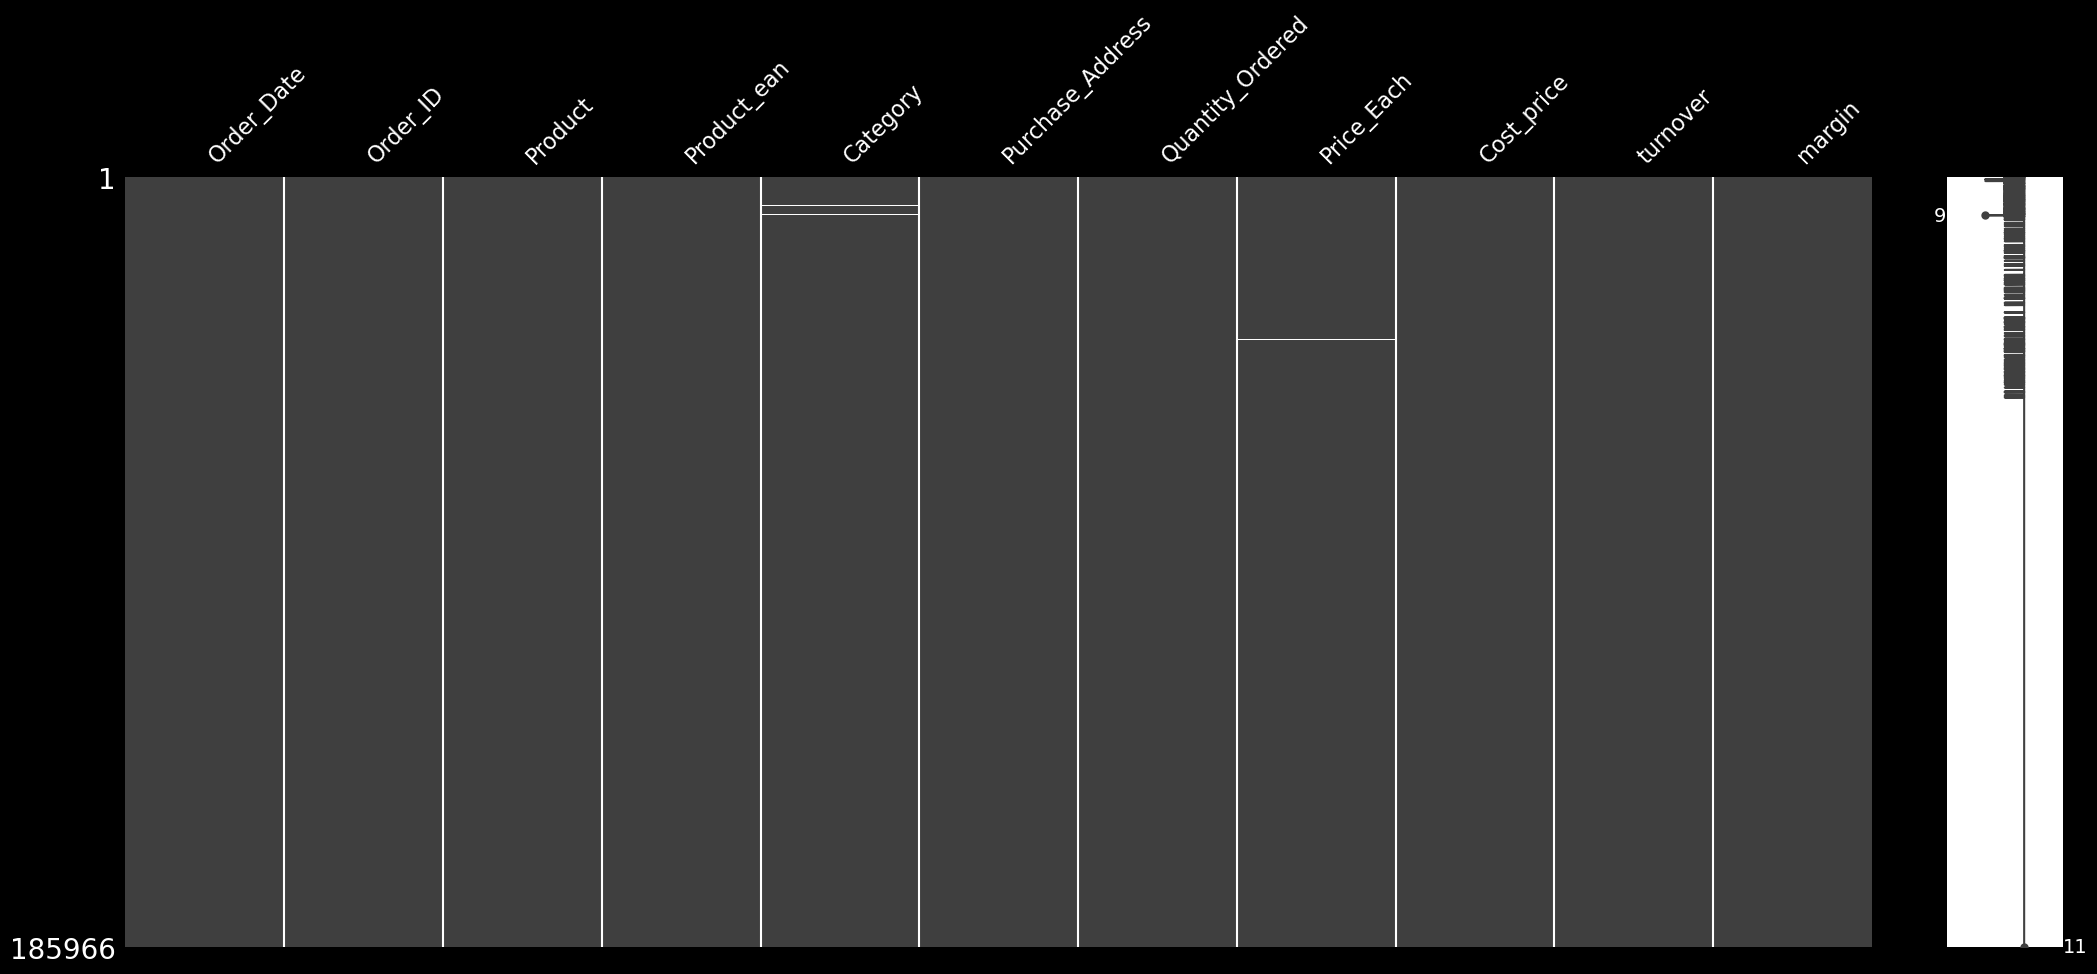

In [150]:
# Visualize missing values as a matrix
msno.matrix(data)

<Axes: >

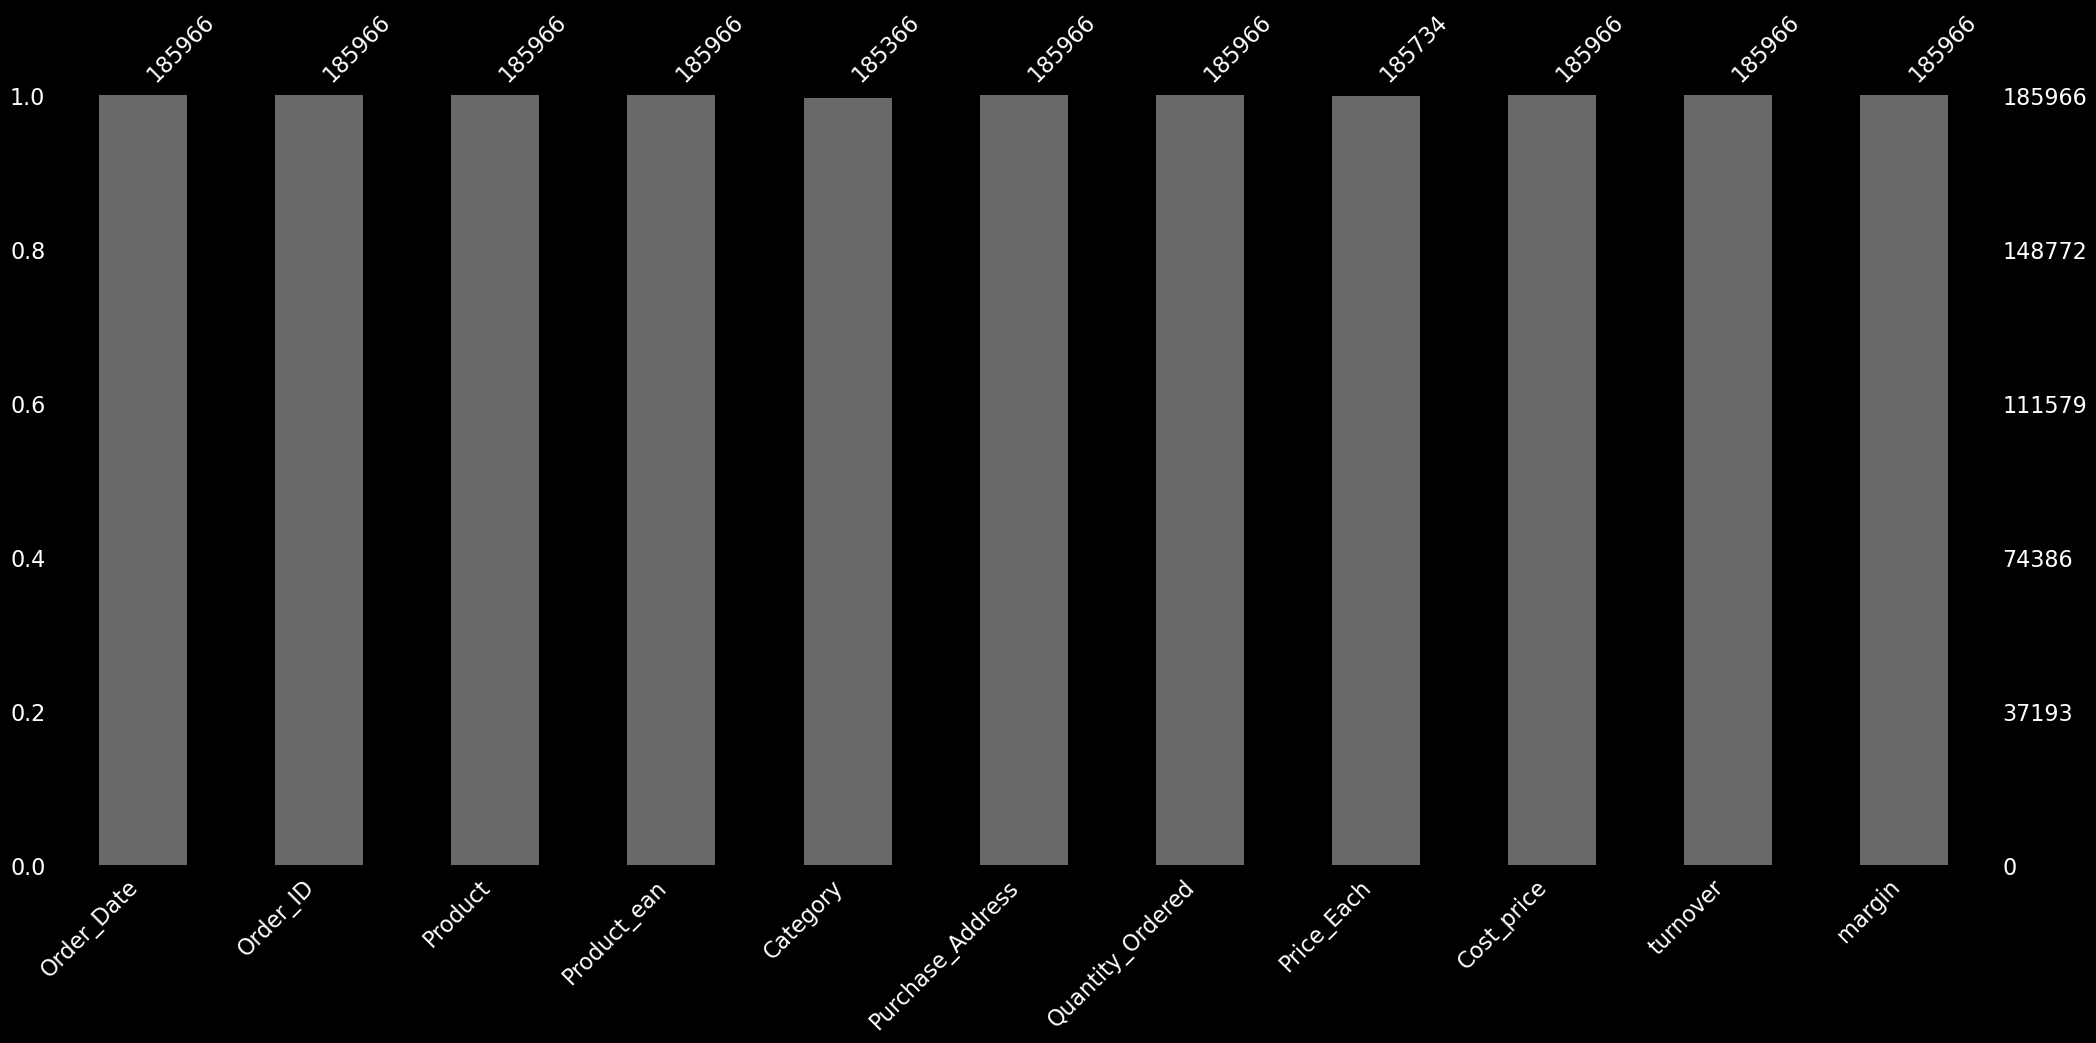

In [151]:
# Visualize the number of missing values as a bar chart
msno.bar(data)

- As we can see their is few null values in the two columns "Category" and "Price_Each" as shown in the matrix and bar chart

<Axes: >

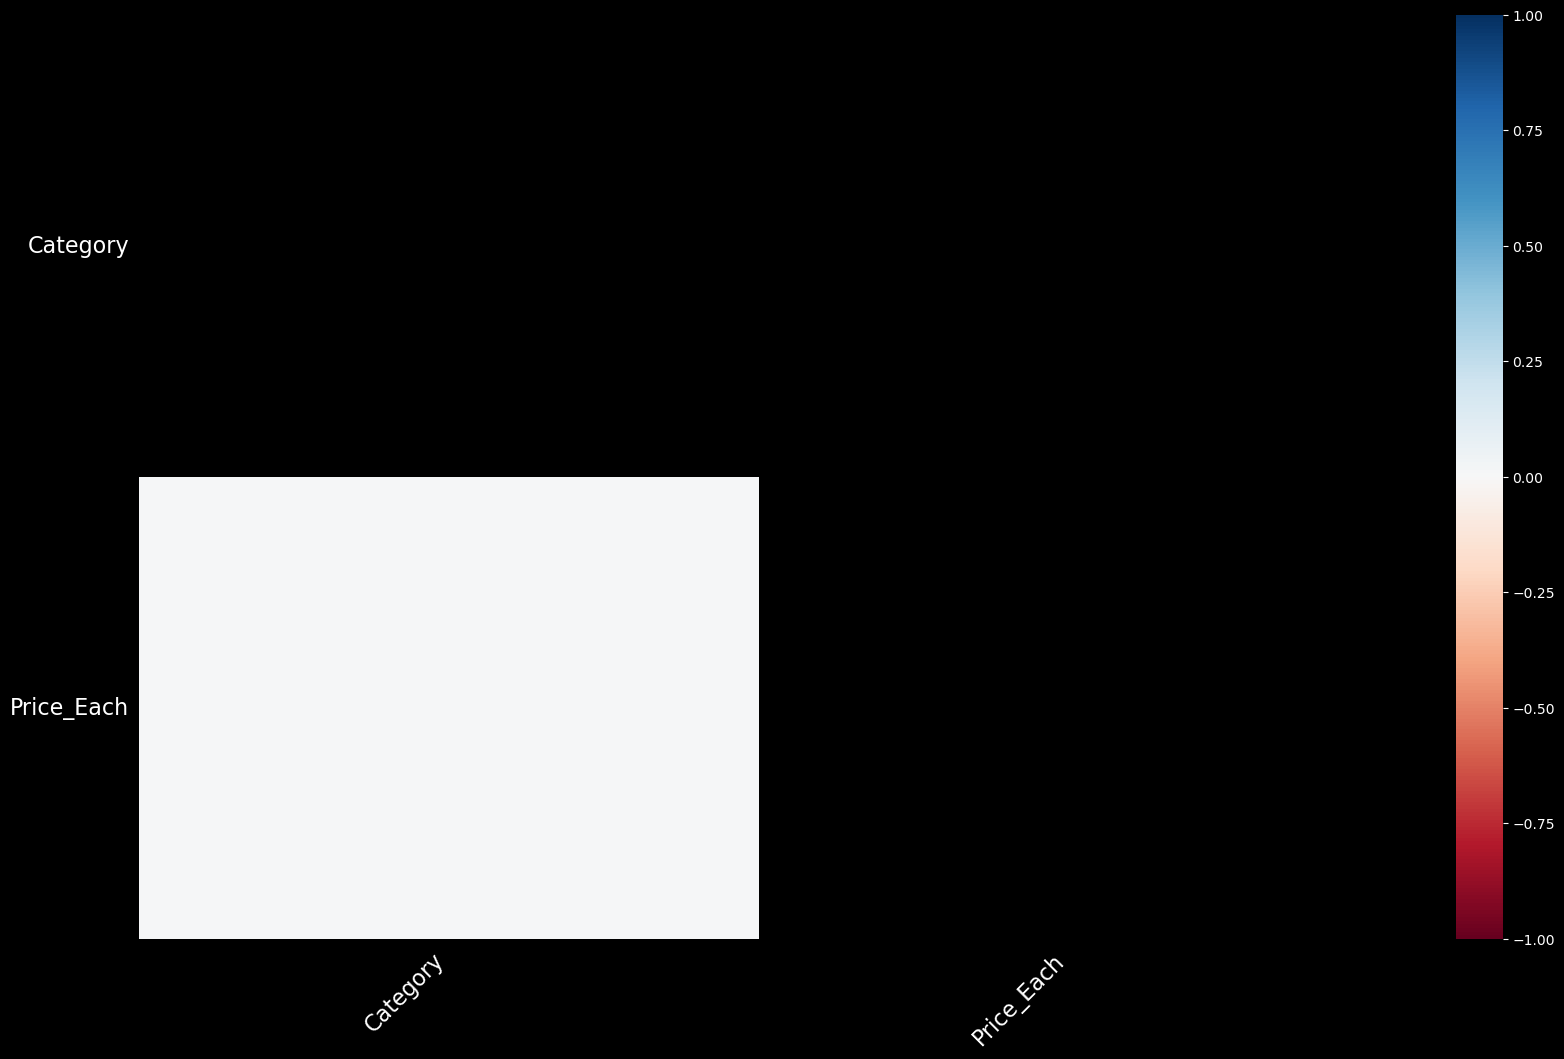

In [152]:
# Visualize the correlation between the number of missing values in different columns as a heatmap
msno.heatmap(data)

-  Their is no srong correlation between the null values in the two columns "Category" and "Price_Each" as shown in the heatmap

### Treating Nulls

In [153]:
data.isnull().sum()

Order_Date            0
Order_ID              0
Product               0
Product_ean           0
Category            600
Purchase_Address      0
Quantity_Ordered      0
Price_Each          232
Cost_price            0
turnover              0
margin                0
dtype: int64

In [154]:
total_miss = data.isnull().sum()
percent_miss = (total_miss/data.isnull().count()*100)

missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

,Total missing,% missing
Category,600,0.322640
Price_Each,232,0.124754
Order_Date,0,0.000000
Order_ID,0,0.000000
Product,0,0.000000
Product_ean,0,0.000000
Purchase_Address,0,0.000000
Quantity_Ordered,0,0.000000
Cost_price,0,0.000000
turnover,0,0.000000


In [155]:
data["Category"].value_counts()

Accessories    134168
Appliances      30044
Phones          12324
electronics      8830
Name: Category, dtype: int64

In [156]:
data_category=data[["Product","Category"]]
data_category.head(10)

,Product,Category
0,iPhone,Phones
1,Lightning Charging Cable,Accessories
2,Wired Headphones,Accessories
3,27in FHD Monitor,NaN
4,Wired Headphones,Accessories
5,AAA Batteries (4-pack),Accessories
6,27in 4K Gaming Monitor,Appliances
7,USB-C Charging Cable,NaN
8,Bose SoundSport Headphones,Accessories
9,Apple Airpods Headphones,Accessories


In [157]:
# data_category.values
data_category_dic=dict(data_category.values)
data_category_dic

{'iPhone': 'Phones',
 'Lightning Charging Cable': 'Accessories',
 'Wired Headphones': 'Accessories',
 '27in FHD Monitor': 'Appliances',
 'AAA Batteries (4-pack)': 'Accessories',
 '27in 4K Gaming Monitor': 'Appliances',
 'USB-C Charging Cable': 'Accessories',
 'Bose SoundSport Headphones': 'Accessories',
 'Apple Airpods Headphones': 'Accessories',
 'Macbook Pro Laptop': 'electronics',
 'Flatscreen TV': 'Appliances',
 'Vareebadd Phone': 'Accessories',
 'AA Batteries (4-pack)': 'Accessories',
 'Google Phone': 'Phones',
 '20in Monitor': 'Appliances',
 '34in Ultrawide Monitor': 'Appliances',
 'ThinkPad Laptop': 'electronics',
 'LG Dryer': 'Appliances',
 'LG Washing Machine': 'Appliances'}

In [158]:
data["Category"]=data["Category"].fillna(data["Product"].map(data_category_dic))
data["Category"].isnull().sum()

0

In [159]:
data_prices=data[["Product","Price_Each"]]
data_prices.head(10)

,Product,Price_Each
0,iPhone,700.00
1,Lightning Charging Cable,14.95
2,Wired Headphones,11.99
3,27in FHD Monitor,149.99
4,Wired Headphones,11.99
5,AAA Batteries (4-pack),2.99
6,27in 4K Gaming Monitor,389.99
7,USB-C Charging Cable,11.95
8,Bose SoundSport Headphones,99.99
9,Apple Airpods Headphones,150.00


In [160]:
data_prices_dic=dict(data_prices.values)
data_prices_dic

{'iPhone': 700.0,
 'Lightning Charging Cable': 14.95,
 'Wired Headphones': 11.99,
 '27in FHD Monitor': 149.99,
 'AAA Batteries (4-pack)': 2.99,
 '27in 4K Gaming Monitor': 389.99,
 'USB-C Charging Cable': 11.95,
 'Bose SoundSport Headphones': 99.99,
 'Apple Airpods Headphones': 150.0,
 'Macbook Pro Laptop': 1700.0,
 'Flatscreen TV': 300.0,
 'Vareebadd Phone': 400.0,
 'AA Batteries (4-pack)': 3.84,
 'Google Phone': 600.0,
 '20in Monitor': 109.99,
 '34in Ultrawide Monitor': 379.99,
 'ThinkPad Laptop': 999.99,
 'LG Dryer': 600.0,
 'LG Washing Machine': 600.0}

In [161]:
data['Price_Each']=data["Price_Each"].fillna(data["Product"].map(data_prices_dic))
data["Price_Each"].isnull().sum()

0

### Treating Duplicates

In [162]:
data[data.duplicated(keep = False)]

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin
6,1/26/2019 12:16,141240,27in 4K Gaming Monitor,5.170000e+12,Appliances,"979 Park St, Los Angeles, CA 90001",1,389.99,128.6967,389.99,261.2933
7,1/5/2019 12:04,141241,USB-C Charging Cable,8.050000e+12,Accessories,"181 6th St, San Francisco, CA 94016",1,11.95,5.9750,11.95,5.9750
8,1/1/2019 10:30,141242,Bose SoundSport Headphones,1.510000e+12,Accessories,"867 Willow St, Los Angeles, CA 90001",1,99.99,49.9950,99.99,49.9950
9,1/22/2019 21:20,141243,Apple Airpods Headphones,1.390000e+12,Accessories,"657 Johnson St, San Francisco, CA 94016",1,150.00,97.5000,150.00,52.5000
10,1/7/2019 11:29,141244,Apple Airpods Headphones,4.330000e+12,Accessories,"492 Walnut St, San Francisco, CA 94016",1,150.00,97.5000,150.00,52.5000
11,1/31/2019 10:12,141245,Macbook Pro Laptop,1.170000e+12,electronics,"322 6th St, San Francisco, CA 94016",1,1700.00,561.0000,1700.00,1139.0000
12,1/9/2019 18:57,141246,AAA Batteries (4-pack),4.440000e+12,Accessories,"618 7th St, Los Angeles, CA 90001",3,2.99,1.4950,8.97,4.4850
13,1/26/2019 12:16,141240,27in 4K Gaming Monitor,5.170000e+12,Appliances,"979 Park St, Los Angeles, CA 90001",1,389.99,128.6967,389.99,261.2933
14,1/5/2019 12:04,141241,USB-C Charging Cable,8.050000e+12,Accessories,"181 6th St, San Francisco, CA 94016",1,11.95,5.9750,11.95,5.9750
15,1/1/2019 10:30,141242,Bose SoundSport Headphones,1.510000e+12,Accessories,"867 Willow St, Los Angeles, CA 90001",1,99.99,49.9950,99.99,49.9950


In [163]:
data.drop_duplicates(keep="last",inplace=True)
data.duplicated().sum()

0

### Converting Types

In [164]:
data["Order_Date"]=pd.to_datetime(data["Order_Date"])
data["Category"]=data["Category"].astype("category")
data["Product"]=data["Product"].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185949 entries, 0 to 185965
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_Date        185949 non-null  datetime64[ns]
 1   Order_ID          185949 non-null  int64         
 2   Product           185949 non-null  category      
 3   Product_ean       185949 non-null  float64       
 4   Category          185949 non-null  category      
 5   Purchase_Address  185949 non-null  object        
 6   Quantity_Ordered  185949 non-null  int64         
 7   Price_Each        185949 non-null  float64       
 8   Cost_price        185949 non-null  float64       
 9   turnover          185949 non-null  float64       
 10  margin            185949 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 14.5+ MB


## EDA

### Feature engineering

In [165]:
data["year"]=data["Order_Date"].dt.year
data["Month"]=data["Order_Date"].dt.month_name()
data["day"]=data["Order_Date"].dt.day_name()

In [166]:
data["Month"]=data["Month"].astype("category")
data["day"]=data["day"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185949 entries, 0 to 185965
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_Date        185949 non-null  datetime64[ns]
 1   Order_ID          185949 non-null  int64         
 2   Product           185949 non-null  category      
 3   Product_ean       185949 non-null  float64       
 4   Category          185949 non-null  category      
 5   Purchase_Address  185949 non-null  object        
 6   Quantity_Ordered  185949 non-null  int64         
 7   Price_Each        185949 non-null  float64       
 8   Cost_price        185949 non-null  float64       
 9   turnover          185949 non-null  float64       
 10  margin            185949 non-null  float64       
 11  year              185949 non-null  int64         
 12  Month             185949 non-null  category      
 13  day               185949 non-null  category      
dtypes: c

In [167]:
Adress_splited=data["Purchase_Address"].str.split(",\s*")
Adress_splited.head()

0          [944 Walnut St, Boston, MA 02215]
1         [185 Maple St, Portland, OR 97035]
2    [538 Adams St, San Francisco, CA 94016]
3       [738 10th St, Los Angeles, CA 90001]
4            [387 10th St, Austin, TX 73301]
Name: Purchase_Address, dtype: object

In [168]:
data["city"]=Adress_splited.str[-2]
data["city_code"]=Adress_splited.str[-1]
data["city_code"]=data["city_code"].str[0:2]
data.head()

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin,year,Month,day,city,city_code
0,2019-01-22 21:25:00,141234,iPhone,5.640000e+12,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,2019,January,Tuesday,Boston,MA
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,2019,January,Monday,Portland,OR
2,2019-01-17 13:33:00,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,2019,January,Thursday,San Francisco,CA
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.070000e+12,Appliances,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,2019,January,Saturday,Los Angeles,CA
4,2019-01-25 11:59:00,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,2019,January,Friday,Austin,TX


# Questions and Visualizations

## Q1 what is the most city recorded?

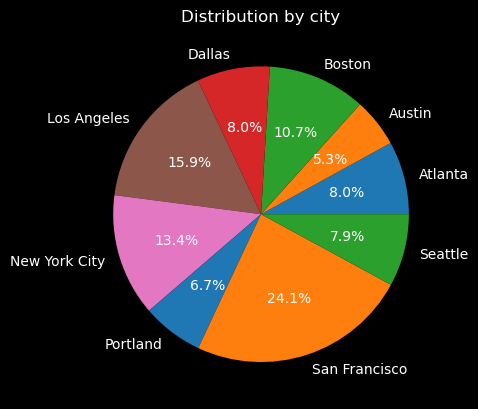

In [183]:
city = data.groupby('city')['city'].count()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8c564b', '#e377c2']
plt.pie(city,labels = city.index,colors=colors,autopct='%1.1f%%')
plt.style.use('dark_background')
plt.title('Distribution by city')
plt.show();

- The most city recorded is "San Francisco" with 24.1% of the data

## Q2 what is the Total_Profit by city?

In [170]:
a=data.groupby("city")["margin"].sum()
a=pd.DataFrame(a)
a.columns=["Total_profit"]
a

plt.figure(figsize = (19, 10))

px.bar(a, y = 'Total_profit',
        title = 'Total_Profit by city', template = 'plotly_dark')

,Total_profit
city,
Atlanta,1.739016e+06
Austin,1.129208e+06
Boston,2.277973e+06
Dallas,1.724265e+06
Los Angeles,3.387181e+06
New York City,2.898378e+06
Portland,1.439438e+06
San Francisco,5.133583e+06
Seattle,1.709025e+06


<Figure size 1900x1000 with 0 Axes>

<Figure size 1900x1000 with 0 Axes>

- San Francisco has the largest profit amoung the cities with a total of 5.134M $.

## Q3 which category has the most profit?

In [171]:
a=data.groupby("Category")["margin"].sum()
a=pd.DataFrame(a)
a.columns=["Total_profit"]
a

plt.figure(figsize = (19, 10))

px.bar(a, y = 'Total_profit',
        title = 'Number of customers in each Month', template = 'plotly_dark')

,Total_profit
Category,
Accessories,2.588674e+06
Appliances,5.261083e+06
Phones,5.436045e+06
electronics,8.152264e+06


<Figure size 1900x1000 with 0 Axes>

<Figure size 1900x1000 with 0 Axes>

- Electronics is the most solt category with a total Profit of 8.15M $.

## Q4 What is the most solt product in each category?

Category     Product                   
Accessories  AA Batteries (4-pack)         20576
             AAA Batteries (4-pack)        20641
             Apple Airpods Headphones      15549
             Bose SoundSport Headphones    13325
             Lightning Charging Cable      21658
             USB-C Charging Cable          21903
             Vareebadd Phone                2065
             Wired Headphones              18882
Appliances   20in Monitor                   4101
             27in 4K Gaming Monitor         6230
             27in FHD Monitor               7507
             34in Ultrawide Monitor         6181
             Flatscreen TV                  4800
             LG Dryer                        646
             LG Washing Machine              666
Phones       Google Phone                   5525
             iPhone                         6842
electronics  Macbook Pro Laptop             4724
             ThinkPad Laptop                4128
Name: Product, dtype: int64

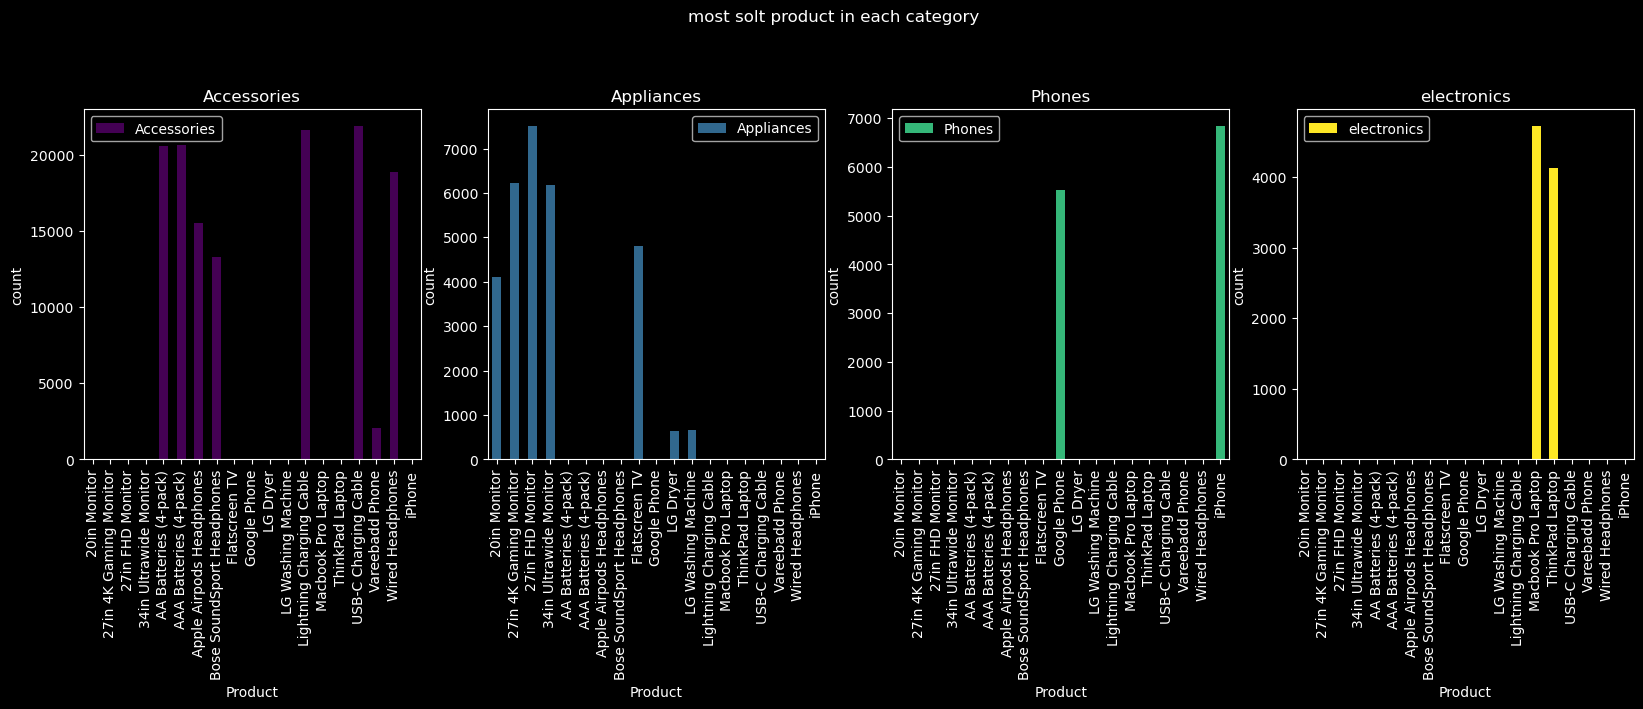

In [186]:
x=data.groupby(["Category","Product"])["Product"].count()
x = x[x.values > 0]
x
ax = x.unstack(level=0).plot(kind='bar', subplots=True, rot=90, figsize=(20, 10), layout=(2, 4),ylabel="count",title = 'most solt product in each category',colormap="viridis")


- The most solt product in Accessories is "USB-C Charging Cable" whit 21903 record
- The most solt product in Appliances is "27in FHD Monitor" with 7507 record
- The most solt product in Phones is "iPhone" with 6842 record
- The most solt product in electronics is" Macbook Pro Laptop" with 4724 record

## Q5 What is the most Month with number of orders?

In [173]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [174]:
a=data.groupby("Month")["Month"].count()
a=pd.DataFrame(a)
a.columns=["count"]

b=pd.DataFrame()
b["Month"]=months
b=pd.merge(b,a,on="Month")
b

plt.figure(figsize = (19, 10))

px.line(b, y = 'count',x=months,
        title = 'Number of customers in each Month', template = 'plotly_dark')

,Month,count
0,January,9709
1,February,11975
2,March,15153
3,April,18279
4,May,16566
5,June,13554
6,July,14292
7,August,11961
8,September,11621
9,October,20282


<Figure size 1900x1000 with 0 Axes>

<Figure size 1900x1000 with 0 Axes>

- There is an increase in sales between January and April, then a decrease until September, then another increase until December, which has the highest number of orders

## Q6 what is the distribustion of sales by month?

In [175]:
a=data.groupby("Month")["margin"].sum()
a=pd.DataFrame(a)
a.columns=["Total_profit"]

b=pd.DataFrame()
b["Month"]=months
b=pd.merge(b,a,on="Month")
b

plt.figure(figsize = (19, 10))

px.line(b, y = 'Total_profit',x=months,
        title = 'Total_Profit in each Month', template = 'plotly_dark')

,Month,Total_profit
0,January,1.132963e+06
1,February,1.369115e+06
2,March,1.741473e+06
3,April,2.109617e+06
4,May,1.965322e+06
5,June,1.602693e+06
6,July,1.642683e+06
7,August,1.396144e+06
8,September,1.300184e+06
9,October,2.325213e+06


<Figure size 1900x1000 with 0 Axes>

<Figure size 1900x1000 with 0 Axes>

- There is an increase in sales between January and April, then a decrease until September, then another increase until December, which has the highest sales 

## Q7 what is the distribution of sales by year?

In [176]:
a=data.groupby("year")["margin"].sum()
a=pd.DataFrame(a)
a.columns=["Total_profit"]
data["year"].value_counts()
a

plt.figure(figsize = (19, 10))

px.line(a, y = 'Total_profit',
        title = 'Total_Profit in each year', template = 'plotly_dark')

2019    185915
2020        34
Name: year, dtype: int64

,Total_profit
year,
2019,2.143278e+07
2020,5.282449e+03


<Figure size 1900x1000 with 0 Axes>

<Figure size 1900x1000 with 0 Axes>

- Their is a decrease in the salse between 2019 and 2020 due to the lack of data in the year 2020.

## Q8 what is the distribution of sales by days of the week?

In [177]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [178]:
a=data.groupby("day")["margin"].sum()
a=pd.DataFrame(a)
a.columns=["Total_profit"]

b=pd.DataFrame()
b["day"]=days
b=pd.merge(b,a,on="day")
b

plt.figure(figsize = (19, 10))

px.line(b, y = 'Total_profit',x=days,
        title = 'Total_Profit in each day', template = 'plotly_dark')

,day,Total_profit
0,Monday,3.035434e+06
1,Tuesday,3.167781e+06
2,Wednesday,3.102941e+06
3,Thursday,3.000538e+06
4,Friday,3.021391e+06
5,Saturday,3.045320e+06
6,Sunday,3.064661e+06


<Figure size 1900x1000 with 0 Axes>

<Figure size 1900x1000 with 0 Axes>

- There is an increase in sales between Monday and Tuesday, which is the highest in sales, then a decrease until Thursday, then a slight increase until Sunday

## Q9 what is the distribution of sales by Quarters?

In [179]:
data["Quarter"]=data["Order_Date"].dt.quarter

In [180]:
a=data.groupby("Quarter")["margin"].sum()
a=pd.DataFrame(a)
a.columns=["Total_profit"]
a

plt.figure(figsize = (19, 10))

px.bar(a, y = 'Total_profit',x=["1st quarter","2nd quarter",'3rd quarter','4th quarter'],
        title = 'Total_Profit in each day', template = 'plotly_dark')

,Total_profit
Quarter,
1,4.243551e+06
2,5.677632e+06
3,4.339011e+06
4,7.177872e+06


<Figure size 1900x1000 with 0 Axes>

<Figure size 1900x1000 with 0 Axes>

- The fourth quarter had the largest profit with 7.17M $.

## Q10 what is the correlation between the features of the data?

C:\Users\Hello\AppData\Local\Temp\ipykernel_23436\1161956152.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Figure size 2400x1200 with 0 Axes>

<Axes: >

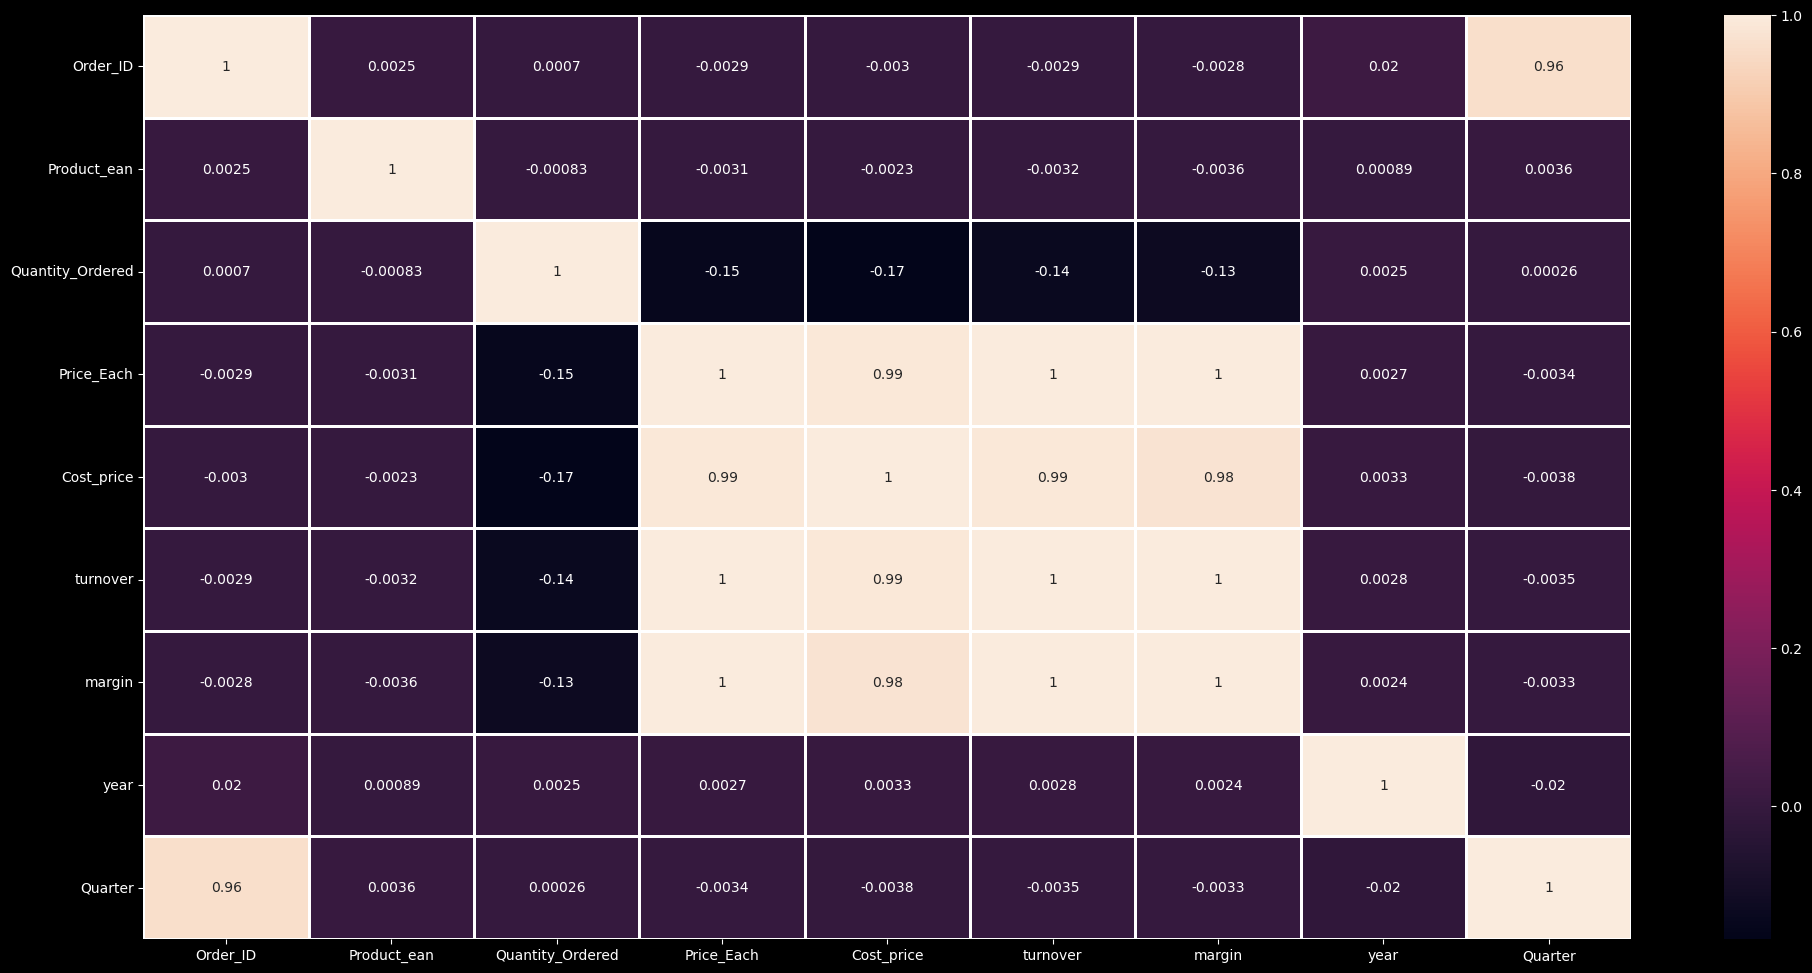

In [181]:
corr = data.corr()

plt.figure(figsize=(24, 12))
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()

- Their is a weak relationship between features but a strong relationship between the "Quarter" and "Order_ID" columns.